# WeatherPy
----

During this exercise, cities from around the world were chosen randomly to perform an analysis of the relationships between latitude and other common weather conditions. To achieve the latter, the OpenWeather API was used in conjunction with the necessary python modules. The code and discussion of the results are presented below.

## Observable trends
----

As said before, with the OpenWeather API some of the weather conditions were obtained for each city. These were latitude, longitude, cloudiness, humidity, maximum temperature, and wind speed. Also, other useful information like the country and date of the request was obtained. Four scatter plots were made between latitude and weather conditions to see if there were some information to extract from them. Then, a linear regression analysis was performed with cities that were located in the northern and southern hemisphere, that is, eight graphs were made to analyze them. The most important trends obtained from the graphs that were mentioned before are the following:
* The maximum values of temperature are when the latitude is closer to 20.
* When latitude of a city is approaching 0 in the southern hemisphere, the maximum temperature increase, and while latitude moves away from zero in the northern hemisphere the maximum temperature decreases. So, the results indicate higher temperatures close to the equator.
* The strongest correlation found were the ones between latitude and maximum temperature in both northern and southern hemisphere. Also, the r-squared values suggest that the regression equation accurately models the data.  
* The rest of the correlation tests and linear regression equations obtained showed a very weak correlation and did not fit the linear model in both the northern and southern hemispheres.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys_hw import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
local_time = time.strftime("%m/%d/%Y", time.localtime())

In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls

In [5]:
cities_df = pd.DataFrame(cities)

In [6]:
cities_df = cities_df.rename(columns={0: "City"})
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] =""
cities_df['Wind Speed'] = ""

In [7]:
record_num = 0
set_num = 1

print("Beginning Data Retrieval")
print("--------------------------------------")

for index, row in cities_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    unit = "imperial"
    name_city = row["City"]
    
    if record_num < 50:
        record_num = record_num + 1
    else:
        set_num = set_num + 1
        record_num = 0
        
    print(f"Procesing Record {record_num} of Set {set_num} | {name_city}")    
    query_url = base_url + "q=" + name_city + "&appid=" + weather_api_key + "&units=" + unit
    response = requests.get(query_url).json()
    try:
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("--------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------")

Beginning Data Retrieval
--------------------------------------
Procesing Record 1 of Set 1 | grindavik
Procesing Record 2 of Set 1 | busselton
Procesing Record 3 of Set 1 | fortuna
Procesing Record 4 of Set 1 | alyangula
Procesing Record 5 of Set 1 | rikitea
Procesing Record 6 of Set 1 | vaini
Procesing Record 7 of Set 1 | mar del plata
Procesing Record 8 of Set 1 | ondorhaan
City not found. Skipping...
Procesing Record 9 of Set 1 | kaitangata
Procesing Record 10 of Set 1 | nizhnyaya salda
Procesing Record 11 of Set 1 | sabancuy
Procesing Record 12 of Set 1 | karpogory
Procesing Record 13 of Set 1 | ilulissat
Procesing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Procesing Record 15 of Set 1 | castro
Procesing Record 16 of Set 1 | hobart
Procesing Record 17 of Set 1 | havre-saint-pierre
Procesing Record 18 of Set 1 | srandakan
Procesing Record 19 of Set 1 | porbandar
Procesing Record 20 of Set 1 | salihorsk
Procesing Record 21 of Set 1 | estelle
Procesing Record 22 of 

Procesing Record 39 of Set 4 | boa vista
Procesing Record 40 of Set 4 | port elizabeth
Procesing Record 41 of Set 4 | sinazongwe
Procesing Record 42 of Set 4 | farafangana
Procesing Record 43 of Set 4 | mount gambier
Procesing Record 44 of Set 4 | bafoulabe
Procesing Record 45 of Set 4 | te anau
Procesing Record 46 of Set 4 | east london
Procesing Record 47 of Set 4 | umm lajj
Procesing Record 48 of Set 4 | iquitos
Procesing Record 49 of Set 4 | sabang
Procesing Record 50 of Set 4 | saint george
Procesing Record 0 of Set 5 | bastia
Procesing Record 1 of Set 5 | san patricio
Procesing Record 2 of Set 5 | floro
Procesing Record 3 of Set 5 | muli
Procesing Record 4 of Set 5 | san lorenzo
Procesing Record 5 of Set 5 | sao filipe
Procesing Record 6 of Set 5 | vila velha
Procesing Record 7 of Set 5 | mbandaka
Procesing Record 8 of Set 5 | honiara
Procesing Record 9 of Set 5 | ahipara
Procesing Record 10 of Set 5 | samalaeulu
City not found. Skipping...
Procesing Record 11 of Set 5 | tabas
Pr

Procesing Record 28 of Set 8 | bolshoye selo
Procesing Record 29 of Set 8 | kozhva
Procesing Record 30 of Set 8 | soluno-dmitriyevskoye
Procesing Record 31 of Set 8 | east wenatchee bench
Procesing Record 32 of Set 8 | tautira
Procesing Record 33 of Set 8 | college
Procesing Record 34 of Set 8 | antofagasta
Procesing Record 35 of Set 8 | mitsamiouli
Procesing Record 36 of Set 8 | viransehir
Procesing Record 37 of Set 8 | toliary
City not found. Skipping...
Procesing Record 38 of Set 8 | chimbote
Procesing Record 39 of Set 8 | binga
Procesing Record 40 of Set 8 | victoria
Procesing Record 41 of Set 8 | espita
Procesing Record 42 of Set 8 | valdosta
Procesing Record 43 of Set 8 | ucluelet
Procesing Record 44 of Set 8 | lanquin
Procesing Record 45 of Set 8 | batagay-alyta
Procesing Record 46 of Set 8 | inhambane
Procesing Record 47 of Set 8 | le port
Procesing Record 48 of Set 8 | general roca
Procesing Record 49 of Set 8 | byron bay
Procesing Record 50 of Set 8 | katsuura
Procesing Recor

Procesing Record 14 of Set 12 | tessalit
Procesing Record 15 of Set 12 | mtimbira
Procesing Record 16 of Set 12 | pyapon
Procesing Record 17 of Set 12 | vilyuysk
Procesing Record 18 of Set 12 | ayaviri
Procesing Record 19 of Set 12 | taicheng
Procesing Record 20 of Set 12 | isla vista
Procesing Record 21 of Set 12 | ponta do sol
Procesing Record 22 of Set 12 | fairlie
Procesing Record 23 of Set 12 | gravdal
--------------------------------------
Data Retrieval Complete
--------------------------------------


In [8]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,grindavik,75,IS,1589204554,61,63.84,-22.43,46.4,23.04
1,busselton,0,AU,1589204554,69,-33.65,115.33,57.99,8.46
2,fortuna,20,US,1589204554,30,40.6,-124.16,57.2,13.87
3,alyangula,96,AU,1589204555,83,-13.85,136.42,75.2,1.12
4,rikitea,98,PF,1589204555,74,-23.12,-134.97,74.1,9.15


In [9]:
cities_df.replace("", np.nan, inplace=True)
cities_df.dropna().count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [10]:
cities_df.to_csv("cities_final.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
def scatter_plot(x_axis, y_axis,title, x_label, y_label):
    plt.scatter(x_axis, y_axis, edgecolor="black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title + f" ({local_time})")
    plt.grid()
    plt.savefig(f"{title}.png")
    plt.show()

#### Latitude vs. Temperature Plot

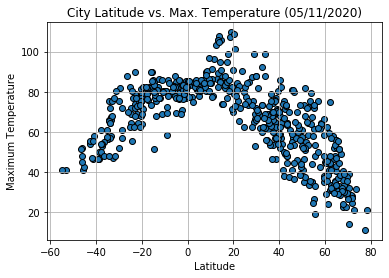

In [12]:
scatter_plot(cities_df["Lat"],
             cities_df["Max Temp"],
             "City Latitude vs. Max. Temperature",
             "Latitude", "Maximum Temperature" )

Previous code is  a function to make a scatter plot taking as arguments each city latitude as x values and maximum temperature as y values. Title, x and y labels are included within the function.

#### Latitude vs. Humidity Plot

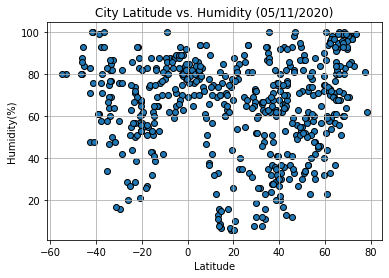

In [13]:
scatter_plot(cities_df["Lat"],
             cities_df["Humidity"],
             "City Latitude vs. Humidity",
            "Latitude", "Humidity(%)")

Previous code is  a function to make a scatter plot taking as arguments each city latitude as x values and humidity percentage as y values. Title, x and y labels are included within the function.

#### Latitude vs. Cloudiness Plot

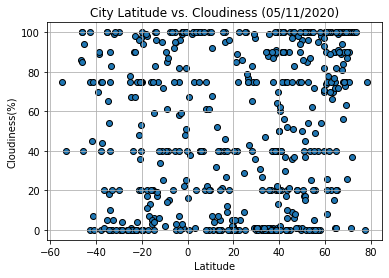

In [14]:
scatter_plot(cities_df["Lat"],
             cities_df["Cloudiness"],
             "City Latitude vs. Cloudiness",
             "Latitude", "Cloudiness(%)")

Previous code is  a function to make a scatter plot taking as arguments each city latitude as x values, and cloudiness percentage as y values. Title, x and y labels are included within the function. 

#### Latitude vs. Wind Speed Plot

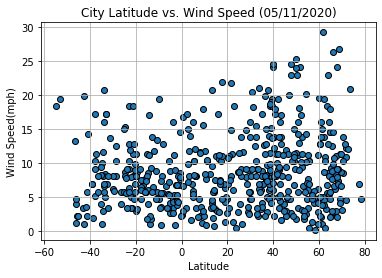

In [15]:
scatter_plot(cities_df["Lat"],
             cities_df["Wind Speed"],
            "City Latitude vs. Wind Speed",
             "Latitude", "Wind Speed(mph)")

Previous code is  a function to make a scatter plot taking as arguments each city latitude as x values, and wind speed as y values. Title, x and y labels are included within the function.

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
# location 
def linear_reg(x_val, y_val, x_lbl, y_lbl, x_coord,y_coord, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_values, "r--")
    plt.text(x_coord,y_coord,equation,color="red", fontsize=15)
    rsquared = rvalue**2
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.title(title)
    print(f"The correlation between both factors is: {round(rvalue,2)}")
    print(f"The r-squared value is: {round(rsquared,2)}")
    plt.savefig(f"{title}.png")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["Lat"]>=0]
southern_df = cities_df.loc[cities_df["Lat"]<0]      

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is: -0.83
The r-squared value is: 0.68


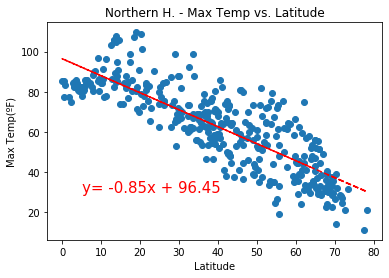

In [18]:
linear_reg(northern_df["Lat"],
           northern_df["Max Temp"],
          "Latitude",
           "Max Temp(ºF)",
           5,30, "Northern H. - Max Temp vs. Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is: 0.78
The r-squared value is: 0.61


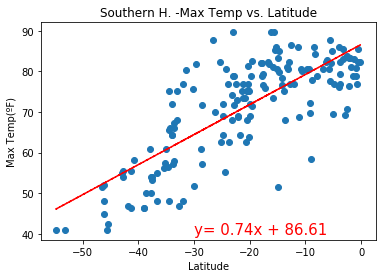

In [19]:
linear_reg(southern_df["Lat"],
           southern_df["Max Temp"],
          "Latitude",
           "Max Temp(ºF)", -30,40, "Southern H. -Max Temp vs. Latitude")

The first graph shows that while the latitude of a city moves away from zero in the northern hemisphere the maximum temperature decrease and while latitude approaches zero in the southern hemisphere the maximum it decreases. It should be noted that the temperature reaches its maximum in latitude between 10 and 20. In addition, the graph indicates a strong negative correlation between both factors since r is greater than 0.7. Finally, it can be said that the regression equation appears to accurately model the data since the r-squared value is closer to 1.

In the case of the southern hemisphere, while latitude approaches zero the maximum temperature increases. Apparently, there is a positive strong correlation (r=0.82) between both factors, however, the regression equation may not be as accurate as with the northern hemisphere (r-squared=0.67).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is: 0.19
The r-squared value is: 0.04


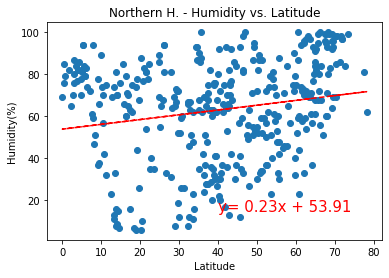

In [20]:
linear_reg(northern_df["Lat"],
           northern_df["Humidity"],
          "Latitude", "Humidity(%)",
           40,15,"Northern H. - Humidity vs. Latitude" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is: 0.07
The r-squared value is: 0.01


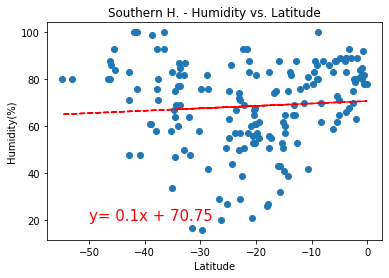

In [22]:
linear_reg(southern_df["Lat"],
           southern_df["Humidity"],
          "Latitude", "Humidity(%)",
           -50,20,"Southern H. - Humidity vs. Latitude")

According to the above graph, it can be seen that there is almost no correlation between humidity and latitude referring to the northern hemisphere. Also, the regression equation clearly not model the data. The second graph clearly shows no correlation as well between humidity and latitude in the southern hemisphere. In addition, the data do not show any group-related patterns and the regression equation may not be appropriate to predict humidity values. So, further analysis needs to be done to determine the factors that affect the humidity of a specific place.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is: 0.26
The r-squared value is: 0.07


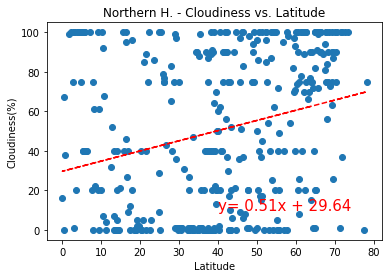

In [24]:
linear_reg(northern_df["Lat"],
           northern_df["Cloudiness"],
          "Latitude", "Cloudiness(%)",
           40,10, "Northern H. - Cloudiness vs. Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is: 0.06
The r-squared value is: 0.0


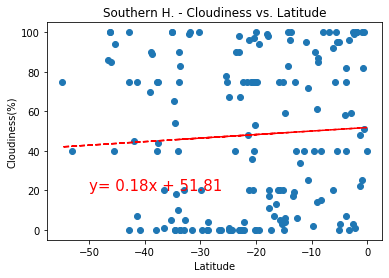

In [25]:
linear_reg(southern_df["Lat"],
           southern_df["Cloudiness"],
          "Latitude", "Cloudiness(%)",
           -50,20, "Southern H. - Cloudiness vs. Latitude")

Talking about cloudiness and latitude graphs in both hemispheres, it can be stated that there is a weak relationship between both factors, and no group related patterns can be found. In both cases the regression equation is not appropriate to make predictions of cloudiness, that is, this equation does not model the data.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is: 0.09
The r-squared value is: 0.01


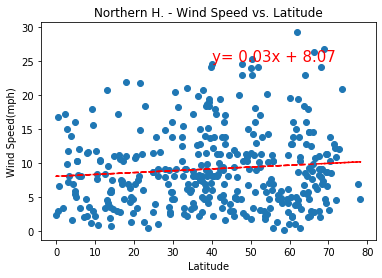

In [26]:
linear_reg(northern_df["Lat"],
           northern_df["Wind Speed"],
          "Latitude", "Wind Speed(mph)",
           40,25, "Northern H. - Wind Speed vs. Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is: -0.17
The r-squared value is: 0.03


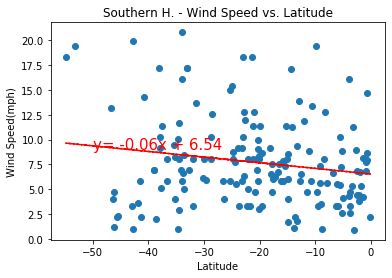

In [27]:
linear_reg(southern_df["Lat"],
           southern_df["Wind Speed"],
          "Latitude", "Wind Speed(mph)",
           -50,9, "Southern H. - Wind Speed vs. Latitude")

Finally, the last two graphs referred to wind speed and latitude. In both cases, Pearson's coefficient suggests a weak relationship between them. In addition, the r-squared value shows that the data do not fit the linear model, so, it is clearly appropriate to predict wind speed values. 